 #下载mnist数据集

下载 train-images-idx3-ubyte.gz...
解压 train-images-idx3-ubyte.gz...
下载 train-labels-idx1-ubyte.gz...
解压 train-labels-idx1-ubyte.gz...
下载 t10k-images-idx3-ubyte.gz...
解压 t10k-images-idx3-ubyte.gz...
下载 t10k-labels-idx1-ubyte.gz...
解压 t10k-labels-idx1-ubyte.gz...


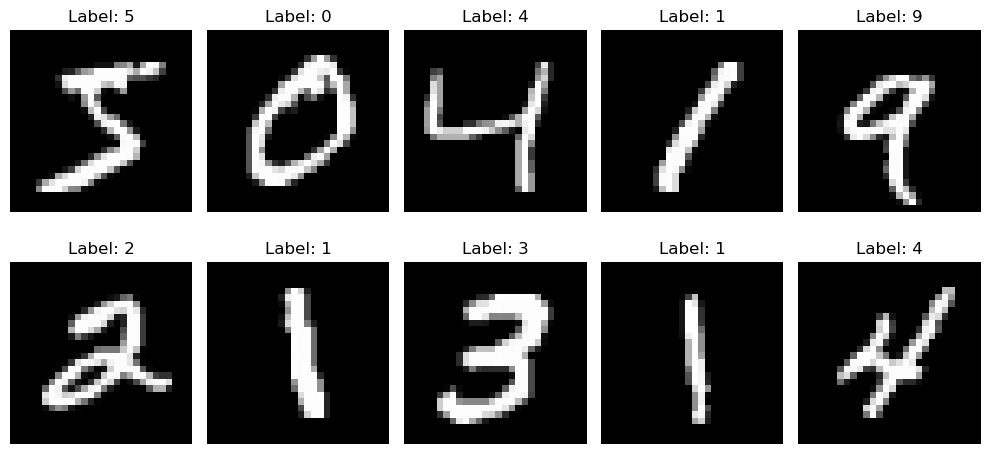

In [7]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import requests
import gzip
import shutil

# ===== 1. 确保数据集存在 =====
def ensure_mnist_exists():
    # 创建正确的目录结构
    data_dir = os.path.join(os.path.expanduser('~'), '.pytorch', 'MNIST_data', 'MNIST', 'raw')
    os.makedirs(data_dir, exist_ok=True)
    
    # 需要下载的文件列表
    files = [
        "train-images-idx3-ubyte.gz",
        "train-labels-idx1-ubyte.gz",
        "t10k-images-idx3-ubyte.gz",
        "t10k-labels-idx1-ubyte.gz"
    ]
    
    base_url = "https://ossci-datasets.s3.amazonaws.com/mnist/"
    
    for file in files:
        file_path = os.path.join(data_dir, file)
        extracted_path = file_path.replace('.gz', '')
        
        # 如果文件已存在则跳过
        if os.path.exists(extracted_path):
            continue
            
        # 下载文件
        print(f"下载 {file}...")
        response = requests.get(base_url + file)
        with open(file_path, 'wb') as f:
            f.write(response.content)
        
        # 解压文件
        print(f"解压 {file}...")
        with gzip.open(file_path, 'rb') as f_in:
            with open(extracted_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        
        # 删除压缩文件（可选）
        os.remove(file_path)

# 确保数据集存在
ensure_mnist_exists()

# ===== 2. 创建数据集加载器 =====
# 正确的数据路径
data_path = os.path.join(os.path.expanduser('~'), '.pytorch', 'MNIST_data')

# 修正Normalize参数格式
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 注意这里是元组 (0.5,)
])

# 使用正确的数据集名称和参数语法
trainset = datasets.MNIST(  # 修正：MNIST 不是 WMIST
    data_path, 
    download=False,         # 修正：download=False 不是 download-False
    train=True, 
    transform=transform     # 修正：transform=transform 不是 transforms-transform
)

testset = datasets.MNIST(   # 修正：MNIST 不是 WMIST
    data_path, 
    download=False,         # 修正：download=False 不是 download-False
    train=False, 
    transform=transform     # 修正：transform=transform 不是 transforms-transform
)

# ===== 3. 可视化 =====
n = 10
plt.figure(figsize=(10, 5))
for i in range(n):
    image, label = trainset[i]
    plt.subplot(2, 5, i+1)
    plt.imshow(image.squeeze().numpy(), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#逻辑斯蒂回归

In [18]:
import torch.nn.functional  as F

x_data = [1,2,3,4,5,6,7,8,9,10]
x_data=torch.Tensor(x_data).view(10,1)
y_data = [0,0,0,0,0,0,1,1,1,1]
y_data=torch.Tensor(y_data).view(10,1)
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__()
        self.linear = torch.nn.Linear(1,1)
    def forward(self,x):
        y_pred =F.sigmoid(self.linear(x))
        return y_pred
    
model = LogisticRegressionModel()

critrion =torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
print("proceing(traning before)", torch.tensor([13]).item())

for epoch in range(1000):
    y_pred = model(x_data)
    loss = critrion(y_pred,y_data)
    print(epoch,loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
test_x= torch.tensor([[13.0]])
print("proceing(traning after):",model(test_x).item())

proceing(traning before) 13
0 32.55522155761719
1 21.575422286987305
2 11.916982650756836
3 6.924773216247559
4 6.556094646453857
5 6.520750045776367
6 6.486202239990234
7 6.4520111083984375
8 6.4181718826293945
9 6.384680271148682
10 6.351532459259033
11 6.318725109100342
12 6.286253452301025
13 6.254116058349609
14 6.2223076820373535
15 6.190824508666992
16 6.159663677215576
17 6.128822326660156
18 6.098294734954834
19 6.068079471588135
20 6.038171768188477
21 6.008569240570068
22 5.979267597198486
23 5.950263977050781
24 5.9215545654296875
25 5.8931355476379395
26 5.865004539489746
27 5.837158679962158
28 5.809593200683594
29 5.782304763793945
30 5.755291938781738
31 5.728550434112549
32 5.702076435089111
33 5.675868034362793
34 5.6499223709106445
35 5.624234676361084
36 5.59880256652832
37 5.5736236572265625
38 5.548694610595703
39 5.524011135101318
40 5.49957275390625
41 5.475374698638916
42 5.451415061950684
43 5.427690505981445
44 5.40419864654541
45 5.380936145782471
46 5.35790

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 准备数据
x_data = torch.tensor([1., 2., 3., 4., 5., 6., 7., 8., 9., 10.]).view(-1, 1)
y_data = torch.tensor([0., 0., 0., 0., 0., 0., 1., 1., 1., 1.]).view(-1, 1)

# 定义模型
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        # 使用sigmoid激活函数
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegressionModel()

# 使用BCE损失函数，注意设置reduction='sum'替代已弃用的size_average=False
criterion = nn.BCELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 训练前预测
test_x = torch.tensor([[63.]])
print("Prediction before training:", model(test_x).item())

# 训练模型
for epoch in range(1000):
    # 前向传播
    y_pred = model(x_data)
    
    # 计算损失
    loss = criterion(y_pred, y_data)
    
    # 每100次迭代打印一次损失
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 训练后预测
print("Prediction after training:", model(test_x).item())

Prediction before training: 1.0
Epoch 0, Loss: 17.3787
Epoch 100, Loss: 4.1652
Epoch 200, Loss: 3.2890
Epoch 300, Loss: 2.8005
Epoch 400, Loss: 2.4853
Epoch 500, Loss: 2.2622
Epoch 600, Loss: 2.0941
Epoch 700, Loss: 1.9617
Epoch 800, Loss: 1.8539
Epoch 900, Loss: 1.7640
Prediction after training: 1.0
